<a href="https://colab.research.google.com/github/Blackcurrant06/MachineLearning/blob/main/UTS/ClusteringTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time
from tqdm.notebook import tqdm

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/UTS/Datasets/UTSClustering.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# Handle missing values
print("Missing values before handling:\n", df.isnull().sum())
for col in ['CustomerID']:
    df[col] = df[col].fillna(df[col].median())
print("\nMissing values after handling:\n", df.isnull().sum())

# Remove duplicate rows
print(f"\nNumber of duplicate rows before removal: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

# Address outliers in numerical features
numerical_cols = ['Quantity', 'UnitPrice']

# Winsorization for 'Quantity'
from scipy.stats.mstats import winsorize
df['Quantity'] = winsorize(df['Quantity'], limits=[0.05, 0.05])

# Winsorization for 'UnitPrice'
df['UnitPrice'] = winsorize(df['UnitPrice'], limits=[0.05, 0.05])

# Displaying the summary of changes
print("\nSummary of changes:")
print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("Data types:\n", df.dtypes)

Missing values before handling:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values after handling:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

Number of duplicate rows before removal: 5268
Number of duplicate rows after removal: 0

Summary of changes:
Number of rows before cleaning: 536641
Number of rows after cleaning: 536641
Number of columns: 8
Data types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [10]:
df = df.drop_duplicates().copy()
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
#Select numeric features
features = df[['Quantity', 'UnitPrice', 'TotalPrice']].copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# # 1. Data Type Examination
# print("Data Types:\n", df.dtypes)

# # 2. Descriptive Statistics
# numerical_features = df.select_dtypes(include=['number']).columns
# print("\nDescriptive Statistics for Numerical Features:\n", df[numerical_features].describe())

# # 3. Distribution Analysis
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_features):
#     plt.subplot(2, 2, i + 1)
#     sns.histplot(df[col], kde=True)
#     plt.title(f"Distribution of {col}")
# plt.tight_layout()
# plt.show()

# # 5. Categorical Variable Analysis
# categorical_features = df.select_dtypes(include=['object']).columns

# # Calculate the number of subplots needed
# num_subplots = len(categorical_features)
# num_rows = (num_subplots + 1) // 2  # Calculate the number of rows needed
# num_cols = min(num_subplots, 2)

# plt.figure(figsize=(15, 5 * num_rows)) # Adjust figure height based on number of rows
# for i, col in enumerate(categorical_features):
#     plt.subplot(num_rows, num_cols, i + 1)
#     df[col].value_counts().plot(kind='bar')
#     plt.title(f'Distribution of {col}')
#     plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# # Relationship between categorical and numerical features (example: Country vs. Quantity)
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Country', y='Quantity', data=df)
# plt.xticks(rotation=90)
# plt.title("Quantity by Country")
# plt.show()

# # 6. Data Shape and Summary
# print("\nData Shape:", df.shape)
# print("\nSummary of Findings:")
# print("The dataset consists of 536641 rows and 8 columns.")
# print("Numerical features ('Quantity', 'UnitPrice', 'CustomerID') show different distributions. 'Quantity' and 'UnitPrice' were Winsorized to address outliers.")
# print("The correlation matrix reveals potential relationships among numerical features, which should be further investigated.")
# print("Categorical features exhibit varying distributions. For example, the 'Country' column shows a high concentration of orders from the 'United Kingdom'.")
# print("The relationship between 'Country' and 'Quantity' is visualized through a boxplot, revealing potential variations in order quantities based on the country of origin.")
# print("Further in-depth analysis including handling of missing values in 'Description' column is needed.")

Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
dtype: object

Descriptive Statistics for Numerical Features:
             Quantity      UnitPrice     CustomerID     TotalPrice
count  536529.000000  536529.000000  536529.000000  536529.000000
mean        7.013105       3.056532   15248.741110      14.035718
std         8.089125       2.622885    1483.794745      18.994929
min         1.000000       0.420000   12346.000000       0.420000
25%         1.000000       1.250000   14367.000000       3.750000
50%         3.000000       2.080000   15152.000000       9.950000
75%        10.000000       4.130000   16241.000000      17.000000
max        30.000000       9.950000   18287.000000     298.500000
Kolom dengan variance rendah (quasi-constant): []
Kolom duplikat: []


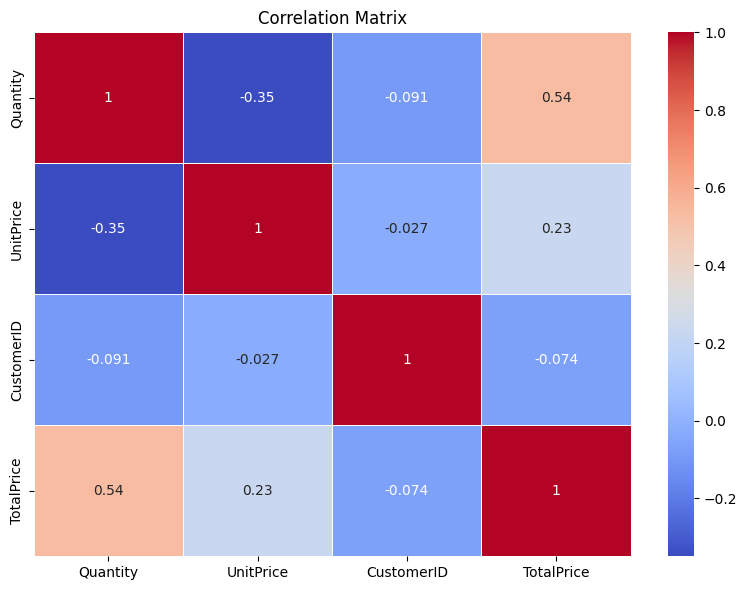

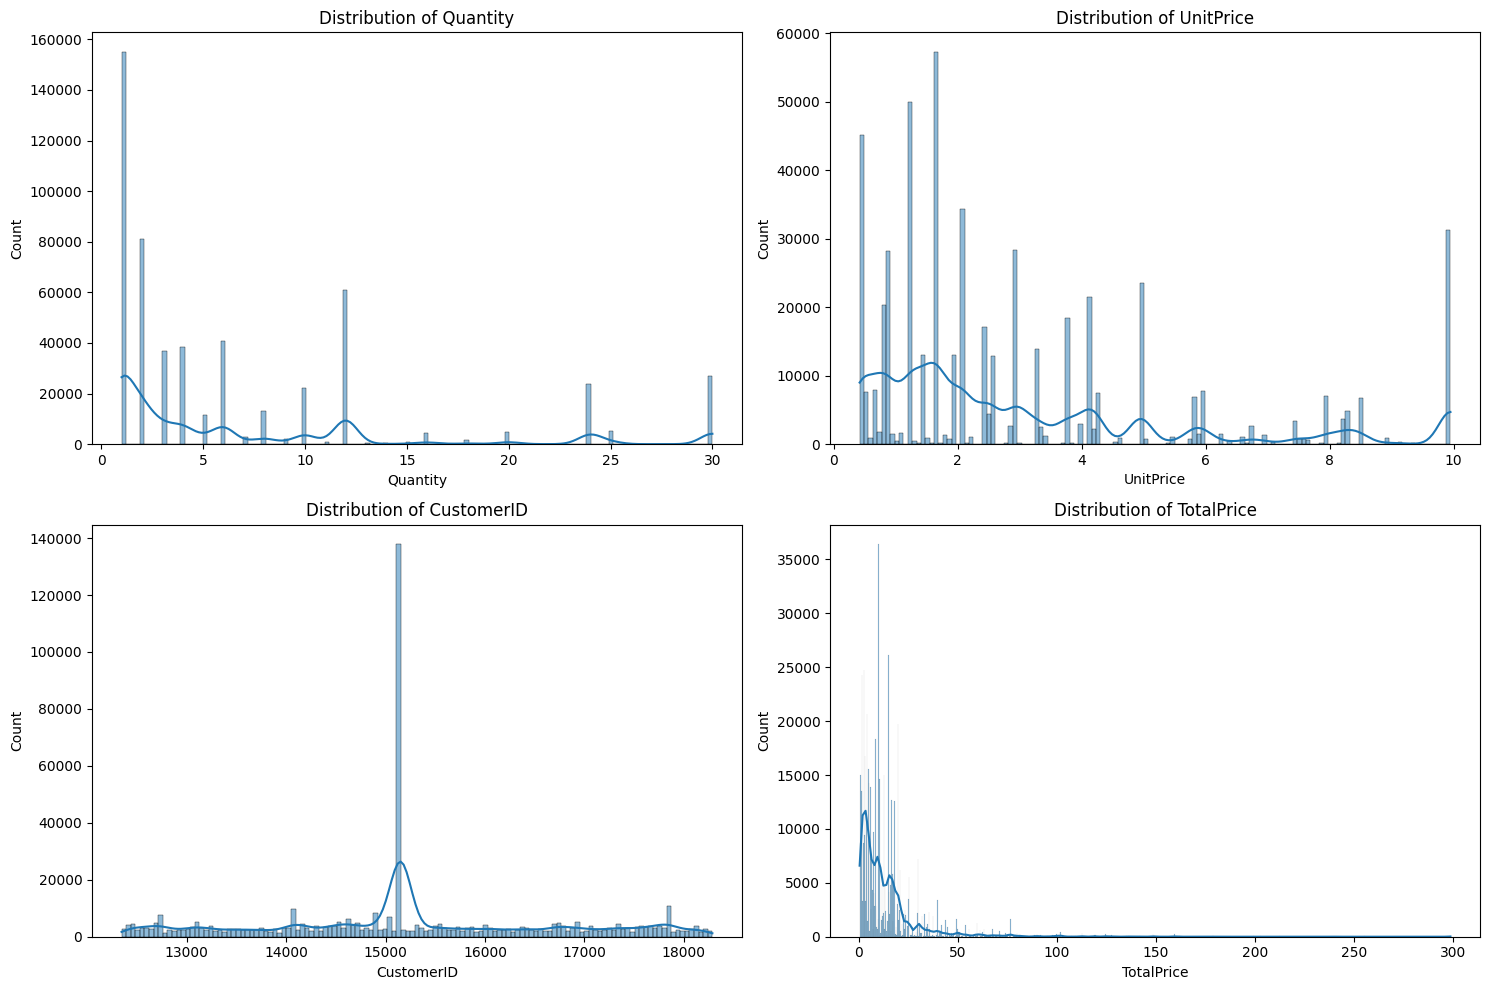

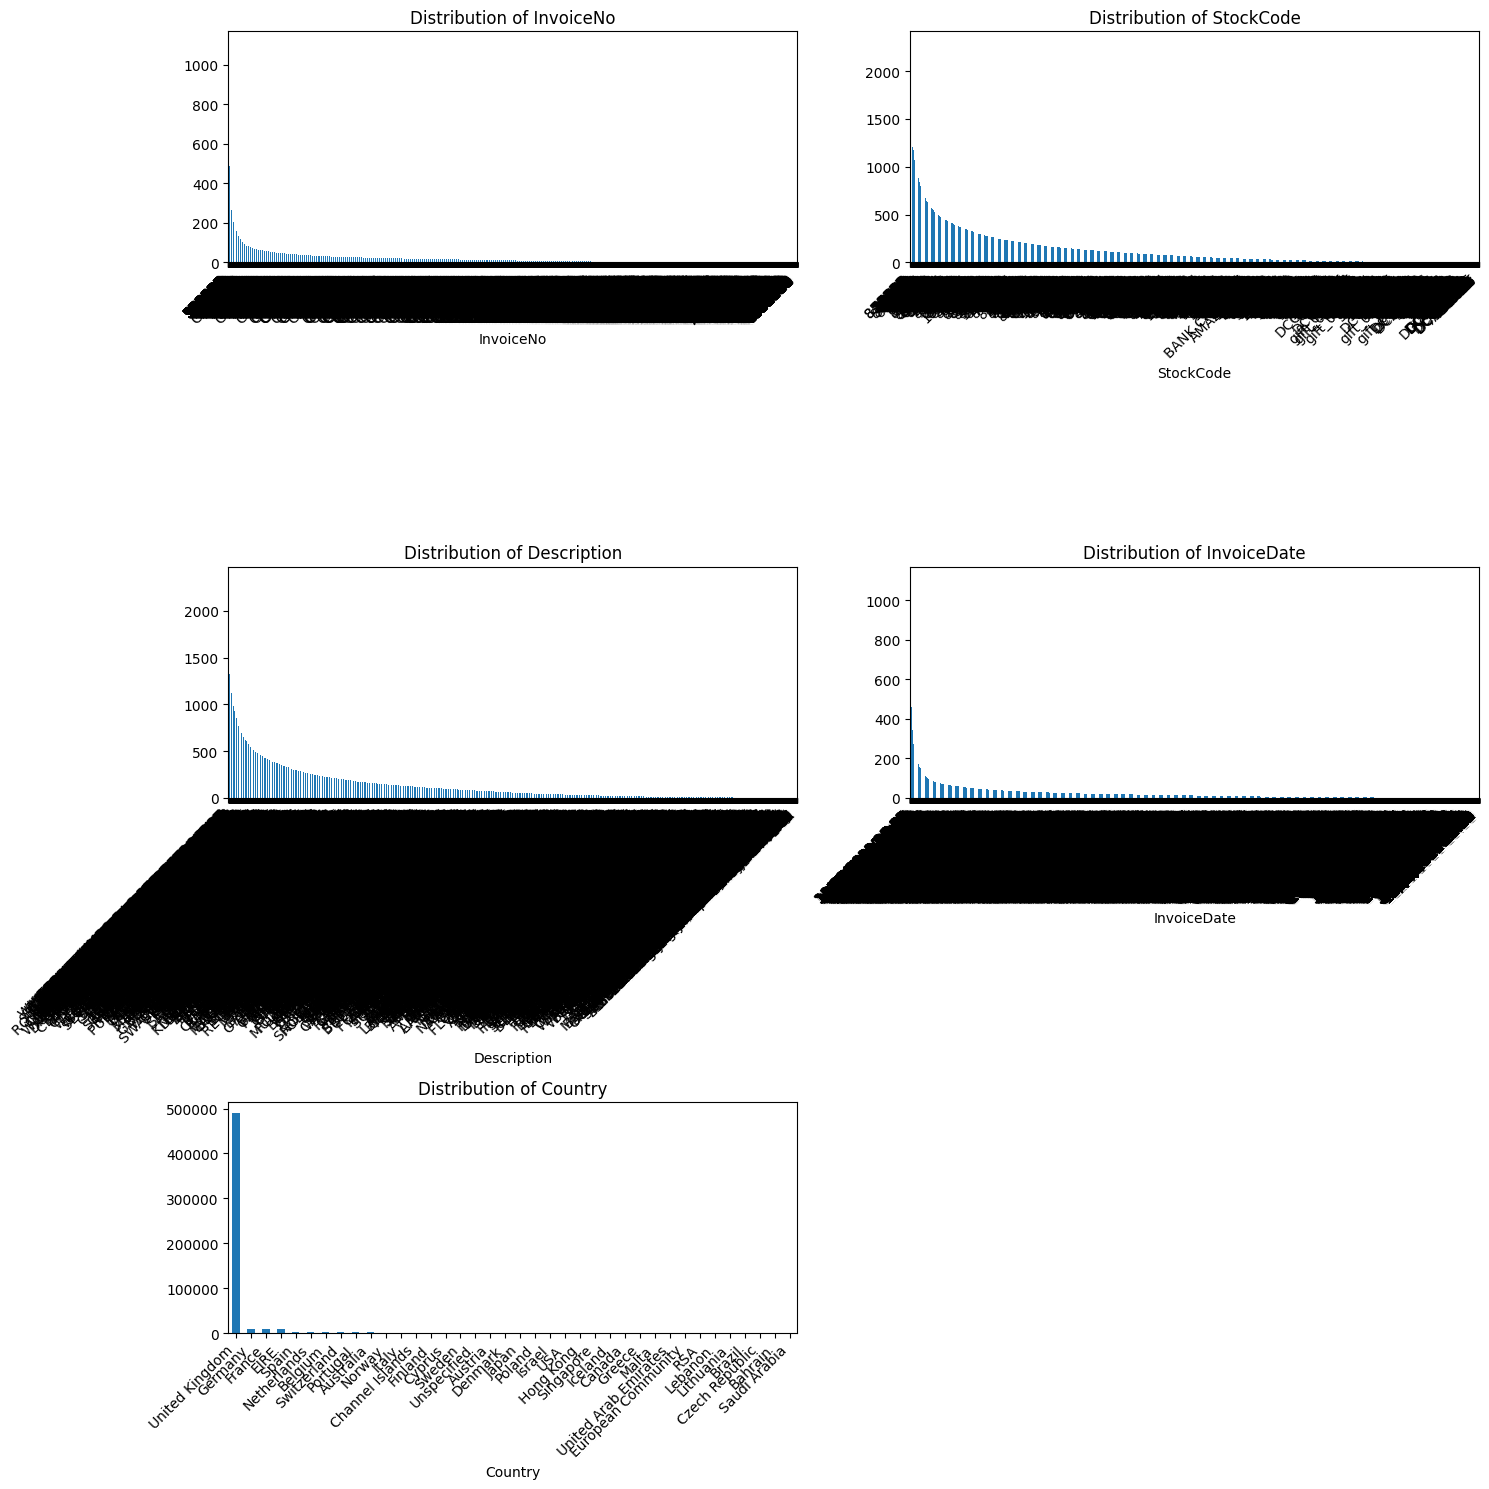

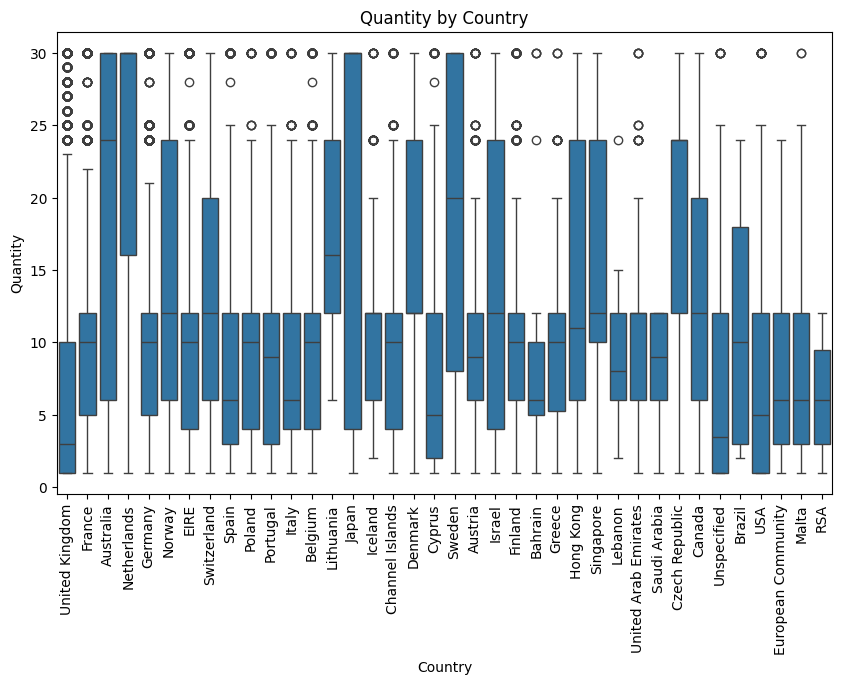


Data Shape: (536529, 9)
Fitur dengan korelasi tinggi (>0.8): set()
Skor Mutual Information (terhadap label K-means sementara):
CustomerID: 1.0378
TotalPrice: 0.1476
UnitPrice: 0.1299
Quantity: 0.0459


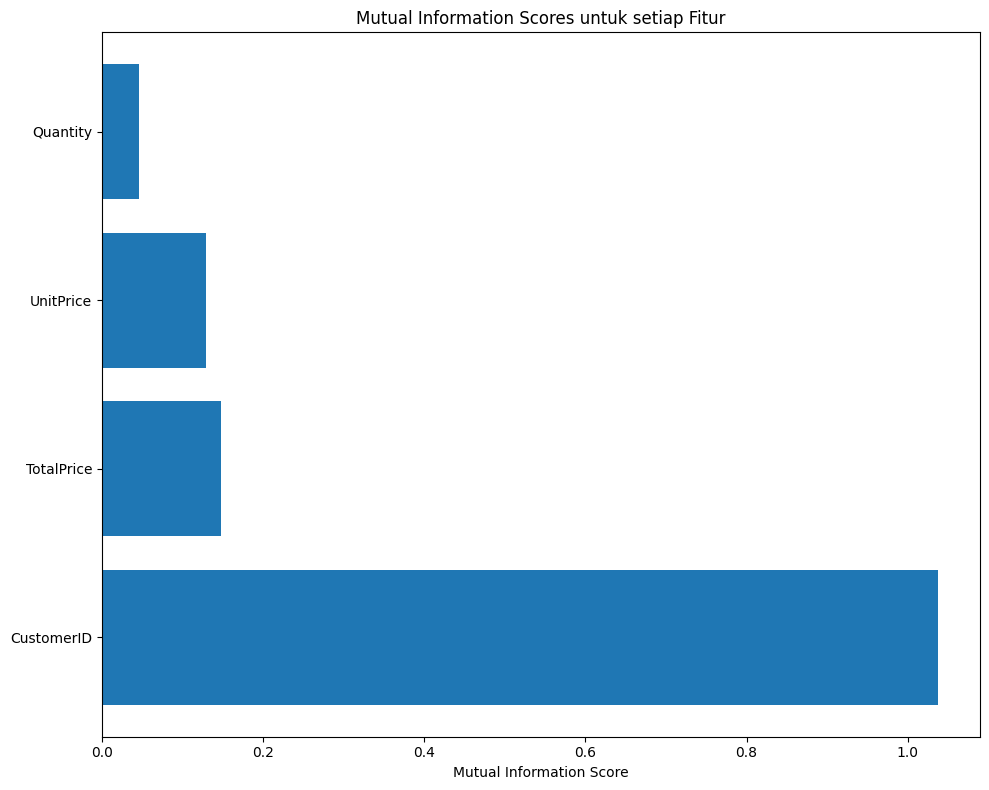


Fitur yang dipilih berdasarkan Mutual Information (>0.05): ['CustomerID', 'TotalPrice', 'UnitPrice']


In [12]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import chi2, f_classif, SelectKBest, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.exceptions import NotFittedError
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Data Type Examination
print("Data Types:\n", df.dtypes)

# 2. Descriptive Statistics
numerical_features = df.select_dtypes(include=['number']).columns
print("\nDescriptive Statistics for Numerical Features:\n", df[numerical_features].describe())

numeric_df = df.select_dtypes(include=[np.number])

constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(numeric_df)


constant_columns = [column for column in numeric_df.columns
                   if column not in numeric_df.columns[constant_filter.get_support()]]

print(f"Kolom dengan variance rendah (quasi-constant): {constant_columns}")
if len(constant_columns) > 0:
    df = df.drop(columns=constant_columns)  # Drop from the original df
    print(f"Menghapus {len(constant_columns)} kolom quasi-constant")

duplicate_cols = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            duplicate_cols.append(df.columns[j])
print(f"Kolom duplikat: {duplicate_cols}")
if len(duplicate_cols) > 0:
    df = df.drop(columns=duplicate_cols)
    print(f"Menghapus {len(duplicate_cols)} kolom duplikat")

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 3. Distribution Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 5. Categorical Variable Analysis
categorical_features = df.select_dtypes(include=['object']).columns

# Calculate the number of subplots needed
num_subplots = len(categorical_features)
num_rows = (num_subplots + 1) // 2  # Calculate the number of rows needed
num_cols = min(num_subplots, 2)

plt.figure(figsize=(15, 5 * num_rows)) # Adjust figure height based on number of rows
for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Relationship between categorical and numerical features (example: Country vs. Quantity)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Quantity', data=df)
plt.xticks(rotation=90)
plt.title("Quantity by Country")
plt.show()
print("\nData Shape:", df.shape)

high_corr_threshold = 0.8
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print(f"Fitur dengan korelasi tinggi (>0.8): {high_corr_features}")
if len(high_corr_features) > 0:
    df = df.drop(columns=list(high_corr_features))
    print(f"Menghapus {len(high_corr_features)} kolom dengan korelasi tinggi")

X = df.select_dtypes(include=[np.number])

for col in X.columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].median(), inplace=True)

temp_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
temp_labels = temp_kmeans.fit_predict(X)

mi_scores = []
for col in X.columns:
    mi = mutual_info_classif(X[[col]], temp_labels, random_state=42)[0]
    mi_scores.append((col, mi))

mi_scores.sort(key=lambda x: x[1], reverse=True)
print("Skor Mutual Information (terhadap label K-means sementara):")
for feature, score in mi_scores:
    print(f"{feature}: {score:.4f}")

plt.figure(figsize=(10, 8))
features, scores = zip(*mi_scores)
plt.barh(features, scores)
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores untuk setiap Fitur')
plt.tight_layout()
plt.show()

mi_threshold = 0.05  # Sesuaikan dengan kebutuhan
selected_features_mi = [feature for feature, score in mi_scores if score > mi_threshold]
print(f"\nFitur yang dipilih berdasarkan Mutual Information (>{mi_threshold}): {selected_features_mi}")

Data shape sebelum feature engineering: (536529, 3)
         CustomerID    TotalPrice     UnitPrice
count  5.365290e+05  5.365290e+05  5.365290e+05
mean   3.436907e-16  1.444582e-16  4.203431e-16
std    1.000001e+00  1.000001e+00  1.000001e+00
min   -1.956297e+00 -7.168087e-01 -1.005204e+00
25%   -5.942479e-01 -5.414986e-01 -6.887583e-01
50%   -6.519851e-02 -2.150954e-01 -3.723125e-01
75%    6.687312e-01  1.560566e-01  4.092705e-01
max    2.047629e+00  1.497582e+01  2.628204e+00

b. PCA untuk dimensionality reduction


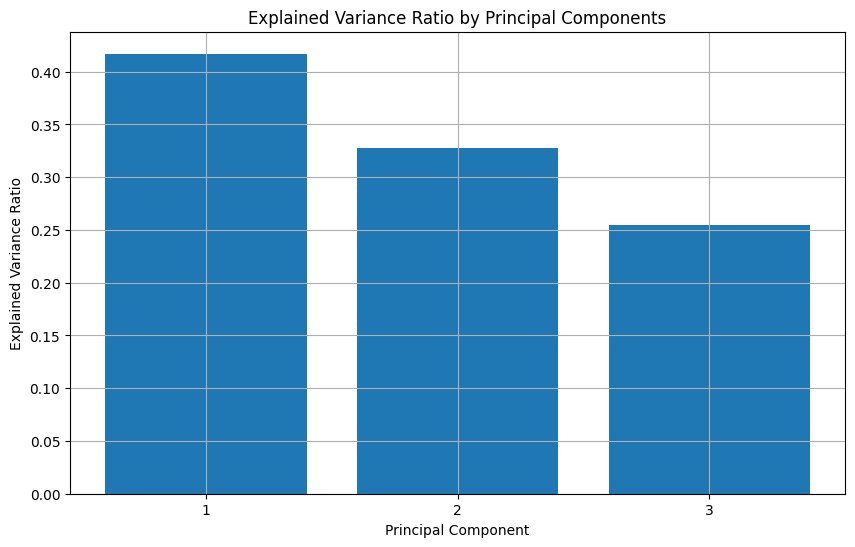

Cumulative explained variance: [0.41707411 0.74522239 1.        ]
Jumlah komponen yang menjelaskan 90% variance: 3
Data shape setelah PCA: (536529, 3)

Statistik deskriptif hasil PCA:
                PC1           PC2           PC3
count  5.365290e+05  5.365290e+05  5.365290e+05
mean  -9.535193e-19  1.673956e-17 -4.237864e-19
std    1.118582e+00  9.921929e-01  8.742621e-01
min   -1.731194e+00 -2.201563e+00 -2.238387e+00
25%   -7.506860e-01 -6.268118e-01 -3.779735e-01
50%   -2.674917e-01 -7.061420e-02  6.852594e-02
75%    4.458607e-01  7.076941e-01  3.991243e-01
max    1.265690e+01  3.966625e+00  9.199999e+00
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-note

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

X = df[selected_features_mi].copy()
print(f"Data shape sebelum feature engineering: {X.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.describe())

print("\nb. PCA untuk dimensionality reduction")

# Impute NaN values in X_scaled before applying PCA
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Convert to DataFrame
X_scaled_df.fillna(X_scaled_df.mean(), inplace=True)  # Impute NaNs with column means
X_scaled = X_scaled_df.values  # Convert back to NumPy array

pca = PCA(n_components=min(5, len(X.columns)))
X_pca = pca.fit_transform(X_scaled)

# Visualisasi explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative explained variance: {cumulative_variance}")

# Pilih jumlah komponen yang menjelaskan minimal 90% variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Jumlah komponen yang menjelaskan 90% variance: {n_components}")

# Lakukan PCA lagi dengan jumlah komponen optimal
pca = PCA(n_components=max(2, n_components))  # Minimal 2 komponen untuk visualisasi
X_pca = pca.fit_transform(X_scaled)
print(f"Data shape setelah PCA: {X_pca.shape}")

# Dataframe untuk hasil PCA
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_cols)

print("\nStatistik deskriptif hasil PCA:")
print(X_pca_df.describe())

# Assuming X_scaled contains the normalized features from previous steps
sample_data = pd.DataFrame(X_scaled).sample(n=2000, random_state=42).values

models = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "GaussianMixture": GaussianMixture(n_components=5, random_state=42),
    "SpectralClustering": SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors', n_neighbors=15)
}


cluster_labels = {}

for name, model in models.items():
    try:
        cluster_labels[name] = model.fit_predict(sample_data)
    except Exception as e:
        print(f"Model {name} gagal dijalankan: {e}")

print(plt.style.available)

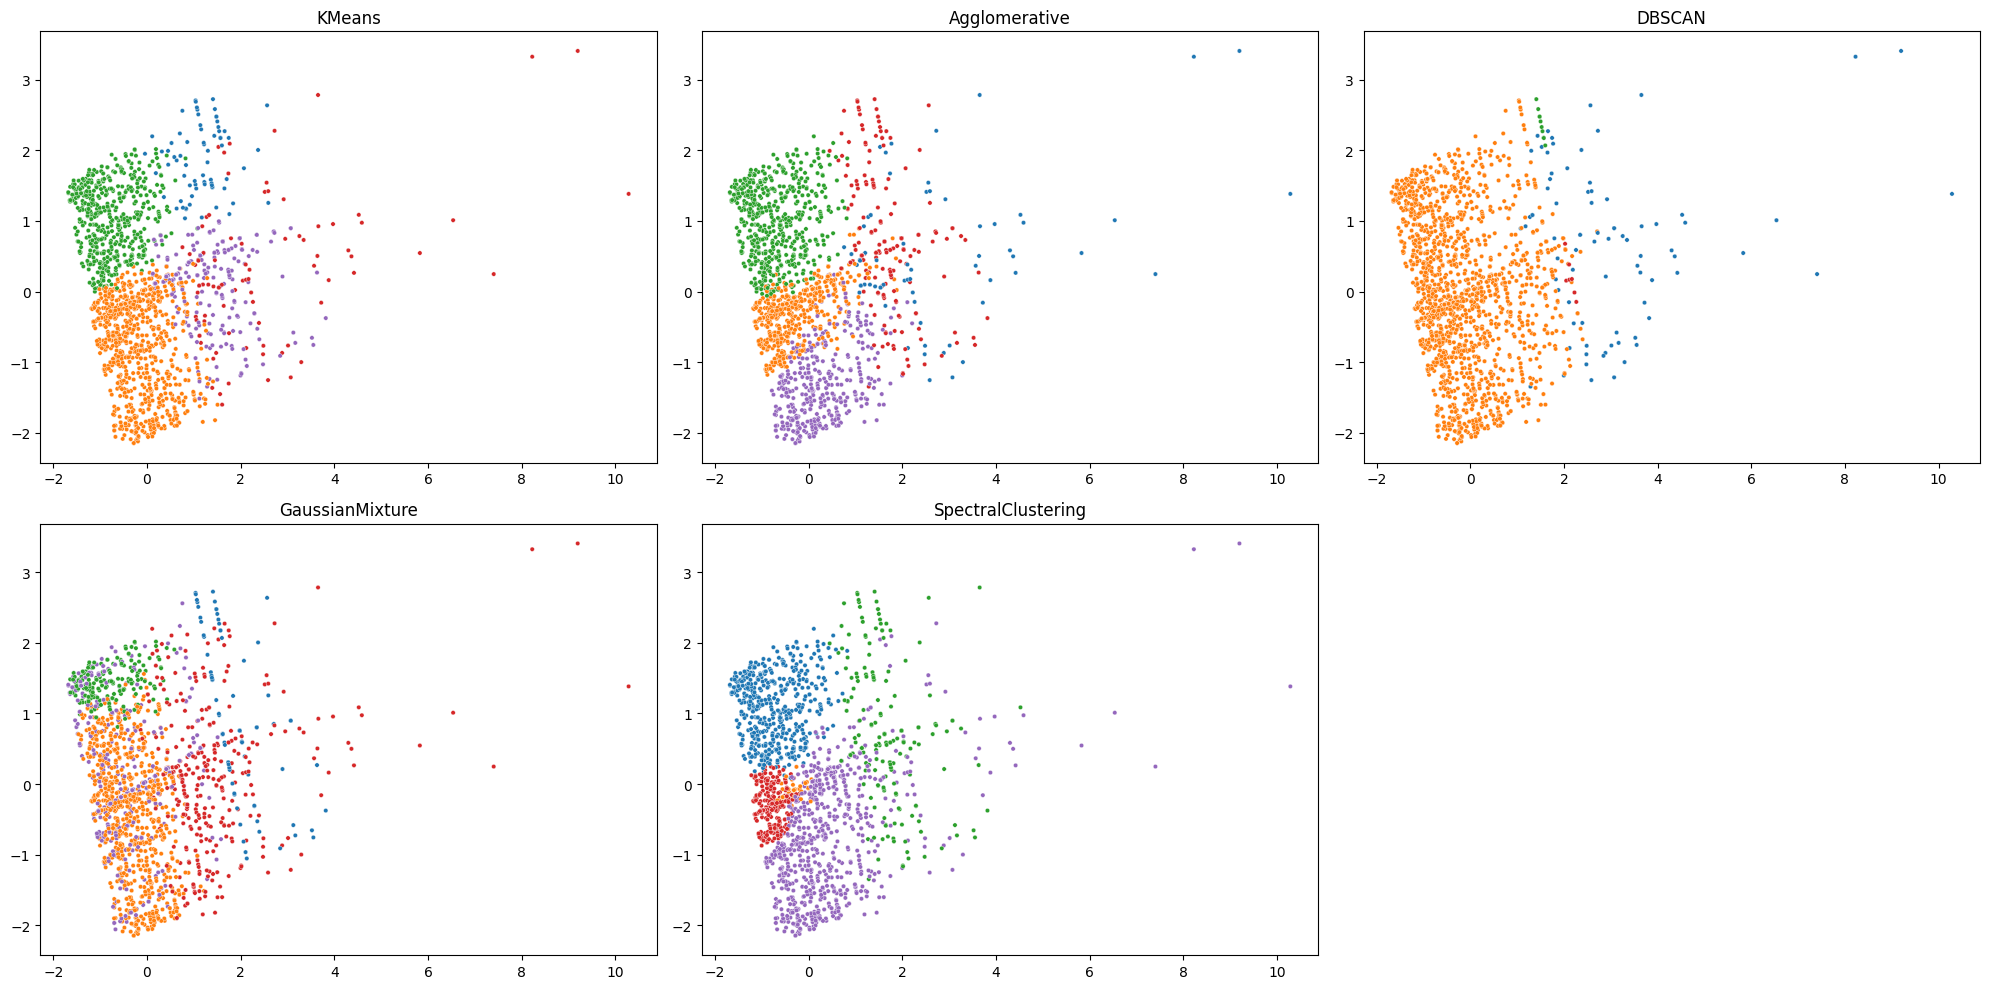

                Model  Silhouette Score  Davies-Bouldin Index  \
0              KMeans          0.366830              0.955002   
1       Agglomerative          0.326167              1.033229   
2              DBSCAN          0.333336              1.267184   
3     GaussianMixture          0.088062              1.720326   
4  SpectralClustering          0.030447              1.964856   

   Calinski-Harabasz Score  
0               887.581442  
1               972.122134  
2               149.695038  
3               376.419028  
4               492.680585  


In [14]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(20, 10))
for i, (name, labels) in enumerate(cluster_labels.items()):
    subset = sample_data  # Semua model memakai sample_data yang sama
    pca_sub = pca.transform(subset)

    # Validasi panjang label dan data
    if len(labels) != len(pca_sub):
        print(f"⚠️  Lewatkan {name}: panjang label ({len(labels)}) ≠ data ({len(pca_sub)})")
        continue

    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=pca_sub[:, 0], y=pca_sub[:, 1], hue=labels, palette='tab10', s=10, legend=False)
    plt.title(name)

plt.tight_layout()
plt.show()

# Sampling
sample_data = pd.DataFrame(X_scaled).sample(n=2000, random_state=42).values

# Clustering
models = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "GaussianMixture": GaussianMixture(n_components=5, random_state=42),
    "SpectralClustering": SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors', n_neighbors=10)
}

scores = []
cluster_labels = {}

for name, model in models.items():
    try:
        labels = model.fit_predict(sample_data)
        cluster_labels[name] = labels

        if len(set(labels)) > 1 and len(set(labels)) < len(sample_data):
            scores.append({
                "Model": name,
                "Silhouette Score": silhouette_score(sample_data, labels),
                "Davies-Bouldin Index": davies_bouldin_score(sample_data, labels),
                "Calinski-Harabasz Score": calinski_harabasz_score(sample_data, labels)
            })
    except Exception as e:
        print(f"{name} gagal dijalankan: {e}")

scores_df = pd.DataFrame(scores)
print(scores_df)

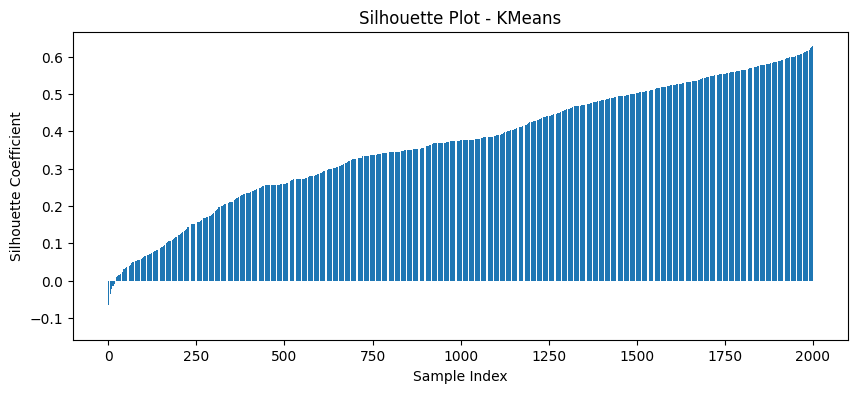

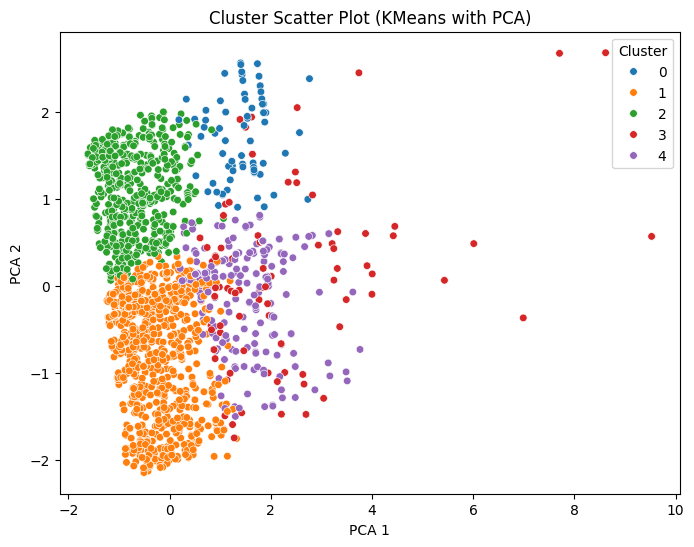

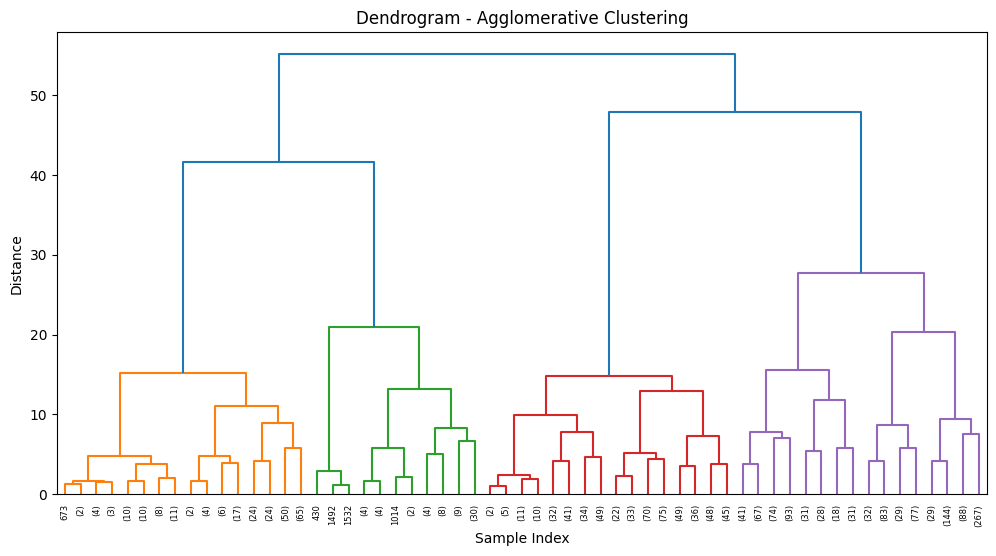

In [15]:
# Silhouette plot untuk KMeans
from sklearn.metrics import silhouette_samples

kmeans_labels = cluster_labels["KMeans"]
silhouette_vals = silhouette_samples(sample_data, kmeans_labels)
plt.figure(figsize=(10, 4))
plt.bar(range(len(silhouette_vals)), np.sort(silhouette_vals))
plt.title("Silhouette Plot - KMeans")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()

# PCA Scatter plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sample_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='tab10', s=30)
plt.title("Cluster Scatter Plot (KMeans with PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Dendrogram untuk Agglomerative
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(sample_data, 'ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [6]:

print("Penjelasan untuk setiap model yang digunakan:")
print("\n1. KMeans:")
print("KMeans adalah algoritma clustering yang mengelompokkan data ke dalam sejumlah cluster yang ditentukan sebelumnya (n_clusters). Algoritma ini bekerja dengan mengiterasi data dan menetapkan setiap titik data ke cluster terdekat berdasarkan centroid dari masing-masing cluster. Centroid cluster kemudian diperbarui berdasarkan titik data dalam cluster tersebut. Proses ini diulang hingga centroid tidak berubah lagi.")
print("\n2. Agglomerative Clustering:")
print("Agglomerative Clustering adalah algoritma hierarkis yang memulai dengan setiap titik data sebagai cluster tersendiri dan kemudian menggabungkan cluster yang paling mirip hingga jumlah cluster yang diinginkan tercapai.  Metode ini membangun dendrogram (diagram pohon) untuk menunjukkan hirarki penggabungan cluster.  Pengukuran kemiripan antara cluster dapat menggunakan berbagai metode linkage (misalnya, ward, complete, average).")
print("\n3. DBSCAN:")
print("DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah algoritma clustering berbasis kepadatan.  Ia mengelompokkan titik data yang berada dalam jarak tertentu (eps) satu sama lain dan memiliki jumlah tetangga minimal (min_samples).  Titik yang tidak memenuhi syarat tersebut dianggap sebagai noise atau outlier. DBSCAN efektif dalam menemukan cluster dengan bentuk sembarang dan mengidentifikasi outlier.")
print("\n4. Gaussian Mixture:")
print("Gaussian Mixture adalah model yang mengasumsikan bahwa data dihasilkan dari campuran beberapa distribusi Gaussian. Algoritma ini bertujuan untuk memperkirakan parameter dari distribusi Gaussian ini (mean, covariance, dan weight) dan kemudian mengklasifikasikan setiap titik data ke dalam komponen Gaussian yang paling mungkin.  Model ini berguna ketika data memiliki struktur multi-modal.")
print("\n5. Spectral Clustering:")
print("Spectral Clustering menggunakan spektrum (eigenvalues dan eigenvectors) dari matriks similaritas untuk mengelompokkan data.  Algoritma ini pertama-tama membangun matriks similaritas yang merepresentasikan kemiripan antara titik data. Kemudian, ia menghitung eigenvectors dari matriks Laplacian (berbasis matriks similaritas) dan menggunakannya untuk merepresentasikan data dalam ruang fitur baru.  Terakhir, algoritma clustering konvensional (misalnya, KMeans) digunakan dalam ruang fitur baru tersebut.")

print("\nEvaluasi Model:")
print("Model-model clustering dievaluasi menggunakan beberapa metrik, yaitu:")
print("- Silhouette Score: Mengukur seberapa mirip sebuah titik data dengan clusternya sendiri dibandingkan dengan cluster lain.")
print("- Davies-Bouldin Index: Mengukur rata-rata kemiripan antara setiap cluster dengan cluster terdekatnya.")
print("- Calinski-Harabasz Score: Mengukur rasio antara variasi antar-cluster dengan variasi dalam setiap cluster.")
print("\nVisualisasi Hasil:")
print("Hasil clustering divisualisasikan menggunakan scatter plot setelah melakukan reduksi dimensi dengan PCA (Principal Component Analysis). PCA digunakan untuk mengurangi dimensi data ke dua dimensi sehingga dapat diplot.")

print("1. Nilai silhouette score yang rendah (0.3) meskipun elbow method menunjukkan K=5 optimal bisa disebabkan oleh beberapa faktor, terutama bentuk cluster yang tidak ideal (non-spherical). Elbow method hanya mengukur variasi dalam cluster, bukan bentuknya.  Cluster yang memanjang atau memiliki bentuk tidak teratur akan sulit dipisahkan dengan baik oleh K-Means, yang mengasumsikan cluster berbentuk bola.")
print("\nStrategi alternatif seperti analisis gap statistic dan validasi stabilitas cluster (bootstrapping) dapat mengatasi masalah ini karena:")
print("\na. Gap statistic membandingkan variasi dalam data cluster dengan variasi data acak.  Ini membantu menentukan apakah cluster yang ditemukan signifikan secara statistik atau hanya akibat random noise. Gap statistic tidak mengasumsikan bentuk cluster tertentu, sehingga lebih robust terhadap data non-spherical.")
print("\nb. Validasi stabilitas cluster via bootstrapping melibatkan pengambilan sampel berulang dari dataset dan menjalankan algoritma K-Means pada setiap sampel. Jika hasil clustering (pengelompokan) relatif konsisten antar sampel, maka clustering tersebut stabil. Metode ini membantu menilai seberapa sensitif hasil cluster terhadap perubahan data, dan dapat mengungkap ketidakstabilan yang mungkin terjadi karena bentuk cluster yang non-spherical.")
print("\nData non-spherical menjadi akar masalah karena K-Means menggunakan jarak Euclidean. Jarak ini sangat sensitif terhadap bentuk cluster.  Jika cluster memiliki bentuk memanjang atau tidak teratur, jarak Euclidean mungkin tidak dapat mengukur jarak antar titik secara akurat, sehingga menyebabkan titik-titik dalam cluster yang sama dianggap jauh dan titik-titik di cluster berbeda dianggap dekat. Hal ini menghasilkan silhouette score yang rendah karena banyak titik yang akan berada di tepi cluster atau mungkin salah masuk cluster.")

print("\n2. Untuk dataset dengan fitur numerik dan kategorikal high-cardinality seperti yang Anda gambarkan, preprocessing yang efektif melibatkan beberapa tahapan:")

print("\na. Penskalaan Fitur Numerik:")
print("  - StandardScaler atau MinMaxScaler direkomendasikan untuk menyamakan skala fitur numerik (Quantity, UnitPrice). StandardScaler mengubah data menjadi distribusi normal standar (mean=0, std=1), sementara MinMaxScaler menskalakan data ke rentang tertentu (misalnya, 0-1).  Pemilihan metode tergantung pada distribusi data dan algoritma clustering yang digunakan.")

print("\nb. Representasi Fitur Kategorikal High-Cardinality (Description):")
print("  - One-Hot Encoding kurang efektif untuk fitur high-cardinality karena dapat menghasilkan dimensi fitur yang sangat besar, menyebabkan *curse of dimensionality* dan meningkatkan kompleksitas komputasi.  Lebih jauh lagi,  One-Hot Encoding tidak memperhatikan hubungan semantik antara kata-kata. Pada konteks clustering, ini dapat menyebabkan pengelompokan yang kurang akurat dan kurang intuitif.")

print("  - TF-IDF (Term Frequency-Inverse Document Frequency):  Merupakan teknik yang lebih baik karena memperhitungkan frekuensi kemunculan suatu kata dalam dokumen (Description) dan juga frekuensi kemunculannya di seluruh dokumen dalam dataset.  Dengan demikian, kata-kata yang sering muncul dalam suatu Description tetapi jarang muncul di Description lain akan memiliki bobot yang lebih tinggi, membantu algoritma clustering untuk membedakan kelompok-kelompok yang berbeda.")

print("  - Embedding berdimensi rendah (UMAP, t-SNE): Teknik ini merepresentasikan fitur teks sebagai vektor dalam ruang berdimensi rendah.  UMAP dan t-SNE efektif dalam mempertahankan struktur data asli dan mengungkap hubungan non-linear, sehingga lebih robust dalam mempertahankan struktur cluster.")

print("  - Word Embeddings (Word2Vec, GloVe, FastText) dapat juga diterapkan terlebih dahulu sebelum menggunakan UMAP/t-SNE. Word embeddings menangkap hubungan semantik antara kata-kata dalam sebuah representasi vektor, sehingga clustering akan lebih akurat berdasarkan makna.")

print("\nRisiko One-Hot Encoding:")
print("  - *Curse of dimensionality*:  Menghasilkan ruang fitur yang sangat besar, membuat algoritma clustering kesulitan menemukan pola yang berarti dan menyebabkan kinerja yang buruk.")
print("  - Tidak memperhatikan hubungan semantik: One-Hot Encoding menganggap semua kata tidak berhubungan satu sama lain, padahal kata-kata tertentu mempunyai makna terkait.  Hal ini menyebabkan data kehilangan konteks dan pengelompokan yang kurang akurat.")
print("  - Sparsity: Matriks data menjadi sparse (banyak nilai 0), yang dapat memperlambat proses komputasi.")

print("\nKeunggulan TF-IDF/Embedding:")
print("  - Menjaga struktur cluster:  Dengan mengekspresikan kata-kata dalam konteks frekuensi atau semantik, struktur data terjaga sehingga pengelompokan lebih mencerminkan kesamaan data yang sebenarnya.")
print("  - Mengatasi *curse of dimensionality*:  Mengurangi jumlah fitur ke dimensi yang lebih rendah.")
print("  - Mengungkap hubungan non-linear: Embedding dan reduksi dimensi seperti UMAP dan t-SNE dapat mengungkap hubungan non-linear antar data yang sulit ditangkap oleh algoritma clustering sederhana.")
print("  - Mempertahankan informasi relevan:  TF-IDF dan embeddings menekankan kata-kata kunci, sedangkan One-Hot Encoding sama-sama memberikan bobot yang sama pada semua kata.")

print("\n3. Menentukan nilai optimal epsilon untuk DBSCAN pada data transaksi yang tidak seimbang membutuhkan pendekatan adaptif karena sensitivitas algoritma terhadap parameter ini.  Berikut penjelasannya:")

print("\na. K-distance Graph:")
print("K-distance graph menggambarkan jarak ke tetangga ke-k terdekat untuk setiap titik data.  Dengan mengurutkan jarak-jarak ini, kita dapat mengidentifikasi titik belok (knee point) pada grafik. Titik belok ini menunjukkan lompatan signifikan dalam jarak ke tetangga ke-k, mengindikasikan batas antara cluster padat dan noise.  Pada data tidak seimbang, seperti data transaksi dengan 90% pelanggan dari UK, titik belok mungkin lebih sulit teridentifikasi karena dominasi satu kelompok data. Oleh karena itu, analisis visual k-distance graph dan pertimbangan distribusi data menjadi penting.")


print("\nb. Kuartil ke-3:")
print("Kuartil ke-3 (Q3) dari jarak ke tetangga ke-k dapat digunakan sebagai nilai epsilon.  Q3 merepresentasikan 75% data dengan jarak terdekat ke-k tertentu. Dengan menggunakan Q3, kita dapat mengurangi dampak outliers dan fokus pada kelompok data padat. Namun perlu diingat, penggunaan Q3 mungkin kurang optimal apabila terdapat banyak cluster dengan kerapatan yang berbeda-beda. Untuk mengatasi hal ini perlu dipertimbangkan lagi titik belok pada k-distance graph.")


print("\nc. Penyesuaian MinPts:")
print("Parameter MinPts menentukan jumlah minimum titik yang diperlukan untuk membentuk cluster. Nilai MinPts yang terlalu kecil dapat menyebabkan terbentuknya banyak cluster kecil yang tidak relevan, sementara nilai yang terlalu besar dapat menyebabkan banyak titik dianggap sebagai noise.  MinPts idealnya harus disesuaikan dengan kerapatan regional data. Daerah dengan kepadatan tinggi membutuhkan nilai MinPts lebih besar dari daerah dengan kepadatan rendah. Pada kasus data tidak seimbang, penggunaan MinPts tunggal kurang optimal.  Perlu dipertimbangkan pendekatan adaptif, misalnya menggunakan perhitungan MinPts berdasarkan kepadatan lokal yang berbeda di setiap region. ")

print("\nd. Automasi Parameter:")
print("Proses penentuan parameter epsilon dan MinPts yang optimal dapat diautomasi dengan menggabungkan visualisasi k-distance graph, pemilihan nilai epsilon berdasarkan Q3 atau titik belok pada k-distance graph, dan penyesuaian adaptif MinPts berdasarkan kepadatan regional.  Contoh implementasi ini dapat memanfaatkan library seperti scikit-learn di Python.")

print("\n4. Jika analisis post-clustering menunjukkan tumpang tindih yang signifikan antara cluster \"pelanggan high-value\" dan \"pembeli massal\" berdasarkan total pengeluaran, teknik semi-supervised seperti constrained clustering atau integrasi metric learning (misalnya, jarak Mahalanobis) dapat meningkatkan pemisahan cluster. ")
print("Constrained clustering memungkinkan penetapan batasan pada algoritma clustering, memaksa anggota cluster tertentu untuk tetap berada dalam cluster yang sama atau terpisah. Dalam kasus ini, kita bisa memberikan batasan yang menyatakan bahwa pelanggan high-value dan bulk buyers harus dipisahkan.  Metric learning, khususnya dengan jarak Mahalanobis, bisa mempelajari metrik jarak yang lebih baik yang mempertimbangkan perbedaan dalam distribusi fitur. Misalnya, metric learning dapat memprioritaskan pemisahan berdasarkan pola pengeluaran dan frekuensi pembelian, bukan hanya total pengeluaran, sehingga mampu membedakan antara high-value customers dan bulk buyers.")
print("Tantangan dalam mempertahankan interpretabilitas bisnis ketika menggunakan pendekatan non-Euclidean adalah metrik jarak yang baru mungkin sulit untuk diinterpretasikan dari sudut pandang bisnis. Jarak Euclidean mudah dipahami -- jarak lurus antara dua titik.  Tetapi metrik seperti jarak Mahalanobis, yang mempertimbangkan kovariansi antar fitur, lebih kompleks.  Meskipun metrik non-Euclidean mungkin menghasilkan clustering yang lebih baik, penting untuk menjelaskan bagaimana metrik tersebut terkait dengan variabel-variabel bisnis yang dapat dipahami oleh pengambil keputusan.  Visualisasi dan analisis lebih lanjut diperlukan untuk mengungkap bagaimana cluster baru terbentuk berdasarkan metrik non-Euclidean dan bagaimana interpretasi bisnis dari cluster tersebut bisa dilakukan.")

print("\n5. Merancang Temporal Features dari InvoiceDate:")
print("  a. Hari dalam seminggu (0: Senin, 1: Selasa, ..., 6: Minggu): Memberikan informasi tentang pola pembelian harian, misal, apakah ada hari tertentu yang lebih banyak transaksi.")
print("  b. Jam pembelian: Membagi hari menjadi beberapa interval waktu (pagi, siang, sore, malam) untuk melihat pola pembelian pada waktu tertentu.")
print("  c. Bulan: Membantu mengidentifikasi pola musiman atau tren bulanan.")
print("  d. Hari dalam bulan: Menunjukkan pola pembelian yang terkait dengan tanggal tertentu dalam sebulan, misal transaksi lebih banyak di awal atau akhir bulan.")
print("  e. Minggu ke-n dalam setahun: Memperlihatkan tren pembelian sepanjang tahun dan mengungkap pola musiman dalam jangka waktu yang lebih panjang.")
print("  f. Libur Nasional atau hari libur lainnya: transaksi bisa meningkat di masa libur.")

print("\nRisiko Data Leakage dengan Agregasi Temporal:")
print("Menggunakan agregasi temporal seperti rata-rata pembelian bulanan tanpa time-based cross-validation dapat menyebabkan data leakage.  Model dapat 'melihat' informasi masa depan saat dilatih. Ketika model digunakan untuk memprediksi data baru di masa mendatang, akurasi model akan menurun karena model telah 'mengetahui' pola di luar waktu pelatihan.")
print("Contoh, jika model dilatih menggunakan rata-rata pembelian bulan Desember dan digunakan untuk memprediksi bulan Desember pada tahun berikutnya, model akan cenderung salah prediksi karena telah mempelajari informasi pada dataset, bukan pola sebenarnya.")

print("\nNoise pada Cluster karena Lag Features:")
print("Lag features, seperti pembelian 7 hari sebelumnya, dapat memperkenalkan noise pada clustering. Transaksi pada waktu yang berbeda dapat di kelompokkan menjadi cluster yang sama, bahkan jika mereka memiliki pola pembelian yang berbeda secara fundamental.  Hal ini dikarenakan data point yang dekat di waktu tetapi berbeda polanya akan dianggap mirip hanya karena variabel lagnya mirip")
print("Contoh, transaksi hari ini tinggi karena ada promosi, tetapi 7 hari lalu rendah.  Jika data poin di cluster berdasarkan variabel lagnya, transaksi tersebut akan dianggap mirip dengan transaksi minggu lalu yang rendah, padahal kedua transaksi ini punya pola yang berbeda.")


Penjelasan untuk setiap model yang digunakan:

1. KMeans:
KMeans adalah algoritma clustering yang mengelompokkan data ke dalam sejumlah cluster yang ditentukan sebelumnya (n_clusters). Algoritma ini bekerja dengan mengiterasi data dan menetapkan setiap titik data ke cluster terdekat berdasarkan centroid dari masing-masing cluster. Centroid cluster kemudian diperbarui berdasarkan titik data dalam cluster tersebut. Proses ini diulang hingga centroid tidak berubah lagi.

2. Agglomerative Clustering:
Agglomerative Clustering adalah algoritma hierarkis yang memulai dengan setiap titik data sebagai cluster tersendiri dan kemudian menggabungkan cluster yang paling mirip hingga jumlah cluster yang diinginkan tercapai.  Metode ini membangun dendrogram (diagram pohon) untuk menunjukkan hirarki penggabungan cluster.  Pengukuran kemiripan antara cluster dapat menggunakan berbagai metode linkage (misalnya, ward, complete, average).

3. DBSCAN:
DBSCAN (Density-Based Spatial Clustering of Application